# Preparations and Initial assessment

## Uploading data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics  import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
pd.set_option("display.max_columns", None)


Stub variables:

In [2]:
CURRENT_YEAR = 2020
CURRENT_MONTH = 2

In [3]:
contract = pd.read_csv("datasets/contract.csv")
internet = pd.read_csv("datasets/internet.csv")
personal = pd.read_csv("datasets/personal.csv")
phone = pd.read_csv("datasets/phone.csv")

In [4]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


1. Contract -  Data in wrong types:
    + BeginDate + EndDate - covert to date format
    + Type divide using ОНЕ
    + PaperlessBilling - to 0/1
    + PaymentMethod (check how many and then probably ОНЕ)
    + TotalCharges check and convert to float
    

In [6]:
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


2. Internet -  Change all tomost all to dummy variable except for maybe InternetService (check how many)

In [8]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [9]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


3. personal -  gender, Partner, Dependents - to 0/1

In [10]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [11]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


4. phone -  MultipleLines - to 0/1

## Changing data types

### Phone

In [12]:
phone.groupby(by='MultipleLines').count()

,customerID
MultipleLines,
No,3390
Yes,2971


In [13]:
encoder = OrdinalEncoder()

In [14]:
phone['MultipleLines'] = encoder.fit_transform(phone[['MultipleLines']])

In [15]:
phone.describe()

,MultipleLines
count,6361.000000
mean,0.467065
std,0.498953
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Phone was switched to dummy variables. 46,7% have Multiple lines - good represention of both groups

### Personal

In [16]:
personal[['gender', 'Partner', 'Dependents']] = encoder.fit_transform(personal[['gender', 'Partner', 'Dependents']])

In [17]:
personal.describe()

,gender,SeniorCitizen,Partner,Dependents
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588
std,0.500013,0.368612,0.499748,0.458110
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Data in personal switched to dummy variables. Good group representaton (except for elderly) 

### Internet

In [18]:
internet.groupby(by='InternetService').count()

,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
InternetService,,,,,,,
DSL,2421,2421,2421,2421,2421,2421,2421
Fiber optic,3096,3096,3096,3096,3096,3096,3096


Since there is only 2 types of InternetService - we use dummy

In [19]:
internet[['InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = encoder.fit_transform(
internet[['InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']])

In [20]:
internet.describe()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,0.561175,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197
std,0.496289,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


internet - switched all variable into dummy, groups have good representation

### Contract

Transform  date into proper format

In [21]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [22]:
contract.groupby(by= 'EndDate').count()

,customerID,BeginDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
EndDate,,,,,,,
2019-10-01 00:00:00,458,458,458,458,458,458,458
2019-11-01 00:00:00,485,485,485,485,485,485,485
2019-12-01 00:00:00,466,466,466,466,466,466,466
2020-01-01 00:00:00,460,460,460,460,460,460,460
No,5174,5174,5174,5174,5174,5174,5174


In [23]:
contract['EndDate'] = contract['EndDate'].replace("No",np.nan)
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

Looking into vars: type, PaymentMethod + PaperlessBilling

In [24]:
contract.groupby('Type').count()

,customerID,BeginDate,EndDate,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Type,,,,,,,
Month-to-month,3875,3875,1655,3875,3875,3875,3875
One year,1473,1473,166,1473,1473,1473,1473
Two year,1695,1695,48,1695,1695,1695,1695


In [25]:
contract.groupby('PaymentMethod').count()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,MonthlyCharges,TotalCharges
PaymentMethod,,,,,,,
Bank transfer (automatic),1544,1544,258,1544,1544,1544,1544
Credit card (automatic),1522,1522,232,1522,1522,1522,1522
Electronic check,2365,2365,1071,2365,2365,2365,2365
Mailed check,1612,1612,308,1612,1612,1612,1612


Type, PaymentMethod - use OHE

In [26]:
contract = contract.join(pd.get_dummies(contract['Type'], prefix='type'))
contract = contract.join(pd.get_dummies(contract['PaymentMethod'], prefix='method'))

In [27]:
contract = contract.drop(['Type', 'PaymentMethod', 'type_Two year', 'method_Mailed check'], axis = 1)

In [28]:
contract[['PaperlessBilling']] = encoder.fit_transform(contract[['PaperlessBilling']])

In [29]:
contract

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,type_Month-to-month,type_One year,method_Bank transfer (automatic),method_Credit card (automatic),method_Electronic check
0,7590-VHVEG,2020-01-01,NaT,1.0,29.85,29.85,1,0,0,0,1
1,5575-GNVDE,2017-04-01,NaT,0.0,56.95,1889.5,0,1,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,1.0,53.85,108.15,1,0,0,0,0
3,7795-CFOCW,2016-05-01,NaT,0.0,42.30,1840.75,0,1,1,0,0
4,9237-HQITU,2019-09-01,2019-11-01,1.0,70.70,151.65,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,1.0,84.80,1990.5,0,1,0,0,0
7039,2234-XADUH,2014-02-01,NaT,1.0,103.20,7362.9,0,1,0,1,0
7040,4801-JZAZL,2019-03-01,NaT,1.0,29.60,346.45,1,0,0,0,1
7041,8361-LTMKD,2019-07-01,2019-11-01,1.0,74.40,306.6,1,0,0,0,0


TotalCharges into numeric format

In [30]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors = 'coerce')

New columns

1. Overall duration of contract

In [31]:
contract['total_time1'] = (CURRENT_YEAR - pd.DatetimeIndex(contract['BeginDate']).year)*12 + \
                          (CURRENT_MONTH - pd.DatetimeIndex(contract['BeginDate']).month)

In [32]:
contract['total_time'] = (pd.DatetimeIndex(contract['EndDate']).year - 
                          pd.DatetimeIndex(contract['BeginDate']).year)*12 + \
                          (pd.DatetimeIndex(contract['EndDate']).month -
                           pd.DatetimeIndex(contract['BeginDate']).month)

In [33]:
contract['total_time'] = contract['total_time'].fillna(contract['total_time1'])

In [34]:
contract = contract.drop('total_time1', axis=1)

In [35]:
contract

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,type_Month-to-month,type_One year,method_Bank transfer (automatic),method_Credit card (automatic),method_Electronic check,total_time
0,7590-VHVEG,2020-01-01,NaT,1.0,29.85,29.85,1,0,0,0,1,1.0
1,5575-GNVDE,2017-04-01,NaT,0.0,56.95,1889.50,0,1,0,0,0,34.0
2,3668-QPYBK,2019-10-01,2019-12-01,1.0,53.85,108.15,1,0,0,0,0,2.0
3,7795-CFOCW,2016-05-01,NaT,0.0,42.30,1840.75,0,1,1,0,0,45.0
4,9237-HQITU,2019-09-01,2019-11-01,1.0,70.70,151.65,1,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,1.0,84.80,1990.50,0,1,0,0,0,24.0
7039,2234-XADUH,2014-02-01,NaT,1.0,103.20,7362.90,0,1,0,1,0,72.0
7040,4801-JZAZL,2019-03-01,NaT,1.0,29.60,346.45,1,0,0,0,1,11.0
7041,8361-LTMKD,2019-07-01,2019-11-01,1.0,74.40,306.60,1,0,0,0,0,4.0


New columns

2. Did the client leave

In [36]:
contract['exit'] = np.where(contract['EndDate'].isna(), 0, 1)

In [37]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customerID                        7043 non-null   object        
 1   BeginDate                         7043 non-null   datetime64[ns]
 2   EndDate                           1869 non-null   datetime64[ns]
 3   PaperlessBilling                  7043 non-null   float64       
 4   MonthlyCharges                    7043 non-null   float64       
 5   TotalCharges                      7032 non-null   float64       
 6   type_Month-to-month               7043 non-null   uint8         
 7   type_One year                     7043 non-null   uint8         
 8   method_Bank transfer (automatic)  7043 non-null   uint8         
 9   method_Credit card (automatic)    7043 non-null   uint8         
 10  method_Electronic check           7043 non-null 

Checking empty values for  TotalCharges. It happend because clients just started

They couldn't stopped using our service - there is no value in keeping them in DF

In [38]:
contract.query('TotalCharges != TotalCharges')

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,type_Month-to-month,type_One year,method_Bank transfer (automatic),method_Credit card (automatic),method_Electronic check,total_time,exit
488,4472-LVYGI,2020-02-01,NaT,1.0,52.55,NaN,0,0,1,0,0,0.0,0
753,3115-CZMZD,2020-02-01,NaT,0.0,20.25,NaN,0,0,0,0,0,0.0,0
936,5709-LVOEQ,2020-02-01,NaT,0.0,80.85,NaN,0,0,0,0,0,0.0,0
1082,4367-NUYAO,2020-02-01,NaT,0.0,25.75,NaN,0,0,0,0,0,0.0,0
1340,1371-DWPAZ,2020-02-01,NaT,0.0,56.05,NaN,0,0,0,1,0,0.0,0
3331,7644-OMVMY,2020-02-01,NaT,0.0,19.85,NaN,0,0,0,0,0,0.0,0
3826,3213-VVOLG,2020-02-01,NaT,0.0,25.35,NaN,0,0,0,0,0,0.0,0
4380,2520-SGTTA,2020-02-01,NaT,0.0,20.00,NaN,0,0,0,0,0,0.0,0
5218,2923-ARZLG,2020-02-01,NaT,1.0,19.70,NaN,0,1,0,0,0,0.0,0
6670,4075-WKNIU,2020-02-01,NaT,0.0,73.35,NaN,0,0,0,0,0,0.0,0


In [39]:
contract = contract.dropna(subset=['TotalCharges'])

### Merging DBs + changing column names

In [40]:
df = contract

In [41]:
df = df.merge(internet, how='left', left_on='customerID', right_on='customerID', suffixes=("_c", "_i"))
df = df.merge(personal, how='left', left_on='customerID', right_on='customerID', suffixes=("_c", "_p"))
df = df.merge(phone, how='left', left_on='customerID', right_on='customerID', suffixes=("_c", "_ph"))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customerID                        7032 non-null   object        
 1   BeginDate                         7032 non-null   datetime64[ns]
 2   EndDate                           1869 non-null   datetime64[ns]
 3   PaperlessBilling                  7032 non-null   float64       
 4   MonthlyCharges                    7032 non-null   float64       
 5   TotalCharges                      7032 non-null   float64       
 6   type_Month-to-month               7032 non-null   uint8         
 7   type_One year                     7032 non-null   uint8         
 8   method_Bank transfer (automatic)  7032 non-null   uint8         
 9   method_Credit card (automatic)    7032 non-null   uint8         
 10  method_Electronic check           7032 non-null 

In [43]:
new_names={'customerID' : 'customer_id', 
           'BeginDate' : 'begin_date', 
           'EndDate' : 'end_date', 
           'PaperlessBilling' : 'paperless', 
           'MonthlyCharges' : 'monthly_charges', 
           'TotalCharges' : 'total_charges', 
           'type_Month-to-month' : 'type_month', 
           'type_One year' : 'type_year', 
           'method_Bank transfer (automatic)' : 'method_bank', 
           'method_Credit card (automatic)' : 'method_credit', 
           'method_Electronic check' : 'method_elcheck', 
           'total_time' : 'total_time', 
           'exit' : 'exit', 
           'InternetService' : 'internet_service', 
           'OnlineSecurity' : 'online_sec', 
           'OnlineBackup' : 'online_backup', 
           'DeviceProtection' : 'device_protect', 
           'TechSupport' : 'tech_sup', 
           'StreamingTV' : 'stream_tv', 
           'StreamingMovies' : 'stream_movie', 
           'gender' : 'gender', 
           'SeniorCitizen' : 'senior', 
           'Partner' : 'partner', 
           'Dependents' : 'dependents', 
           'MultipleLines' : 'multiple_lines', }

In [44]:
df = df.rename(columns = new_names)

Nan values after merge happend because client doesn't use this service (if data is correct) 

1. Create columns to show what is used by client
2. Fillna with 0

In [45]:
df['use_internet'] = np.where(df['internet_service'].isna(), 0, 1)
df['use_phone'] = np.where(df['multiple_lines'].isna(), 0, 1)

In [46]:
df = df.fillna(0)

## Prelimenary analysis

In [47]:
df[['use_internet', 'use_phone']].describe()

,use_internet,use_phone
count,7032.000000,7032.000000
mean,0.783845,0.903299
std,0.411650,0.295571
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [48]:
df.groupby(by='exit')[['use_internet', 'use_phone']].sum()

,use_internet,use_phone
exit,,
0,3756,4653
1,1756,1699


In [49]:
df.groupby(by='exit')[['use_internet', 'use_phone']].count()

,use_internet,use_phone
exit,,
0,5163,5163
1,1869,1869


In [50]:
x = (df.groupby(by='exit')[['use_internet', 'use_phone']].sum() /
df.groupby(by='exit')[['use_internet', 'use_phone']].count())
x

,use_internet,use_phone
exit,,
0,0.727484,0.901220
1,0.939540,0.909042


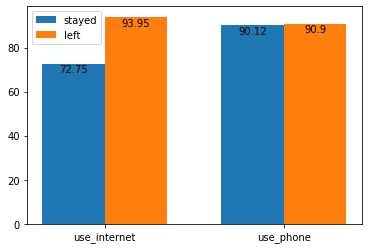

In [51]:
fig, ax = plt.subplots(facecolor='white')

labels = ['use_internet', 'use_phone']
width = 0.35

x1 = ax.bar( np.arange(len(labels)) - width/2, round(x.T[0]*100, 2), width, label='stayed')
x2 = ax.bar( np.arange(len(labels)) + width/2, round(x.T[1]*100, 2), width, label='left')

ax.bar_label(x1, padding=-11)
ax.bar_label(x2, padding=-11)
ax.set_xticks(np.arange(len(labels)), labels)
ax.legend()

plt.show()

In overall df 90% of people use phone service and 78% - internet service

Phone service is not a determinant factor to distinguish between those who has stayed and who has left. But 94% jn those who left - used internet service (although only 78% use that service)

**Conclusion 1**: people who use internet services have a higher chance of leaving (either less satisfied, or more flexible)

In [52]:
df.groupby(by='exit')[['use_internet', 'use_phone']].sum()

,use_internet,use_phone
exit,,
0,3756,4653
1,1756,1699


In [53]:
y = df.query('use_phone == 1')
display(y[['multiple_lines']].describe())

y = (y.groupby(by='exit')[['multiple_lines']].sum() /
y.groupby(by='exit')[['multiple_lines']].count())
display(y)

,multiple_lines
count,6352.000000
mean,0.467097
std,0.498955
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


,multiple_lines
exit,
0,0.454975
1,0.500294


**Conclusion 2**: Using multiple lines correlates to a higher chance of leaving

In [54]:
z = pd.DataFrame()
z=df[['exit']].describe()
z['average_overall'] = z['exit']
y = df.query('use_phone == 1 and use_internet==1')
z['both internet and phone']=y[['exit']].describe()
y = df.query('use_phone == 1 and use_internet==0')
z['only phone']=y[['exit']].describe()
y = df.query('use_phone == 0 and use_internet==1')
z['only internet']=y[['exit']].describe()
z= z.drop('exit', axis=1)

In [55]:
z

,average_overall,both internet and phone,only phone,only internet
count,7032.000000,4832.000000,1520.000000,680.000000
mean,0.265785,0.328228,0.074342,0.250000
std,0.441782,0.469617,0.262413,0.433331
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000


**Conclusion 3**: Among those who used both services almost 1/3 left

In [56]:
z = pd.DataFrame()
z=df[['monthly_charges']].describe()
z['average_charges_overall'] = z['monthly_charges']
z= z.drop('monthly_charges', axis=1)
y = df.query('exit==1')
z['exit_charges'] = y[['monthly_charges']].describe()
z

,average_charges_overall,exit_charges
count,7032.000000,1869.000000
mean,64.798208,74.441332
std,30.085974,24.666053
min,18.250000,18.850000
25%,35.587500,56.150000
50%,70.350000,79.650000
75%,89.862500,94.200000
max,118.750000,118.350000


**Conclusion 4**: Clients who left payed more on average

In [57]:
z = df.query('type_month == 0 and type_year == 0')
z = z.query('begin_date > "2018-01-01"')
display(z)
z.query('exit == 1')

,customer_id,begin_date,end_date,paperless,monthly_charges,total_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone
11,7469-LKBCI,2018-10-01,0,0.0,18.95,326.80,0,0,0,1,0,16.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,1
158,6371-NZYEG,2018-10-01,0,0.0,64.25,1024.00,0,0,0,0,0,16.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1.0,1.0,0.0,1,1
159,7554-NEWDD,2019-04-01,0,0.0,25.70,251.60,0,0,1,0,0,10.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0,1
172,6727-IOTLZ,2018-12-01,0,0.0,81.95,1181.75,0,0,0,0,0,14.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.0,0.0,1,1
196,9178-JHUVJ,2018-02-01,0,1.0,24.10,587.40,0,0,1,0,0,24.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6818,8148-WOCMK,2019-06-01,0,0.0,19.60,125.00,0,0,0,1,0,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,0,1
6823,3635-JBPSG,2018-11-01,0,1.0,38.80,603.00,0,0,0,0,0,15.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,1,0
6854,8792-AOROI,2019-06-01,0,0.0,65.50,564.35,0,0,0,0,0,8.0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0.0,1,1
6947,3078-ZKNTS,2019-01-01,0,1.0,19.75,246.70,0,0,1,0,0,13.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0,1


,customer_id,begin_date,end_date,paperless,monthly_charges,total_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone


In [58]:
z = df.query('type_month == 0 and type_year == 0')
z = z.query('begin_date > "2018-01-01"')
z.head()

,customer_id,begin_date,end_date,paperless,monthly_charges,total_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone
11,7469-LKBCI,2018-10-01,0,0.0,18.95,326.80,0,0,0,1,0,16.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,1
158,6371-NZYEG,2018-10-01,0,0.0,64.25,1024.00,0,0,0,0,0,16.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1.0,1.0,0.0,1,1
159,7554-NEWDD,2019-04-01,0,0.0,25.70,251.60,0,0,1,0,0,10.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0,1
172,6727-IOTLZ,2018-12-01,0,0.0,81.95,1181.75,0,0,0,0,0,14.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.0,0.0,1,1
196,9178-JHUVJ,2018-02-01,0,1.0,24.10,587.40,0,0,1,0,0,24.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,1.0,0,1


In [59]:
z = df.query('type_year == 1')
z = z.query('begin_date > "2019-01-02"')
display(z)
display(z.query('exit == 1'))

,customer_id,begin_date,end_date,paperless,monthly_charges,total_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone
21,1680-VDCWW,2019-02-01,0,0.0,19.80,202.25,0,1,1,0,0,12.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0,1
40,8865-TNMNX,2019-04-01,0,0.0,49.55,475.70,0,1,0,0,0,10.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,1,1
146,6837-BJYDQ,2019-11-01,0,0.0,19.60,61.35,0,1,0,0,0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,1
164,2907-ILJBN,2019-03-01,0,0.0,20.60,233.90,0,1,0,0,0,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0,1
222,6469-MRVET,2020-01-01,0,1.0,20.20,20.20,0,1,0,0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,3898-BSJYF,2019-04-01,0,0.0,73.55,693.30,0,1,0,1,0,10.0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0.0,1.0,1.0,1,1
6619,9979-RGMZT,2019-07-01,0,1.0,94.05,633.45,0,1,0,0,0,7.0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,1,1
6627,3468-DRVQJ,2019-04-01,0,0.0,70.30,676.15,0,1,0,0,1,10.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0,1.0,1.0,1,1
6674,0305-SQECB,2019-03-01,0,1.0,36.05,402.60,0,1,0,0,0,11.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,1,0


,customer_id,begin_date,end_date,paperless,monthly_charges,total_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone
657,4464-JCOLN,2019-11-01,2020-01-01 00:00:00,0.0,19.85,35.9,0,1,0,0,0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,0,1
1371,3164-AALRN,2019-07-01,2019-12-01 00:00:00,1.0,70.00,347.4,0,1,0,0,0,5.0,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0.0,0.0,0.0,1,1
1489,2667-WYLWJ,2019-02-01,2019-10-01 00:00:00,1.0,19.75,145.0,0,1,0,0,0,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0,1
2799,6158-DWPZT,2019-02-01,2019-11-01 00:00:00,0.0,24.10,259.8,0,1,1,0,0,9.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0,1,0
3784,6598-RFFVI,2019-09-01,2019-11-01 00:00:00,0.0,19.30,28.3,0,1,0,1,0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0,1
3830,3932-CMDTD,2019-08-01,2019-12-01 00:00:00,1.0,105.65,443.9,0,1,0,0,1,4.0,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,1,1
5112,8563-IIOXK,2019-05-01,2019-12-01 00:00:00,1.0,49.75,331.3,0,1,0,0,1,7.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,1,1
5882,4905-JEFDW,2019-02-01,2020-01-01 00:00:00,1.0,41.60,470.6,0,1,0,0,1,11.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,1,0


**Conclusion 5**: We have 1year and 2 year contracts. Some of them had their term renewed - so we can judge the decision of a client to renew them (or nor). Others didn't have their initial term expire. For example if a person signed a year countract in Dec 2019 - only 3 months have passed until the current date. So we don't know whether he will leave company. Having such people could scew the results.
This situaton appears in 148 2year and 118 1 year contracts

**Question 1** We have 1year contracts that were closed after only 2 months (8). Is this correct, or there is problem with data?

**Conclusion 6**: While we have data until 01.02.2020 - there are no contracts that were canceled on this date. Most likely the data on cancelations for 01.02.2020 was not given - so monthly contracts for Jan 2020 didn't have a chance to be cancelled yet - we need to take them out of the df.

In [60]:
df['total_time'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: total_time, dtype: float64

In [61]:
z = pd.DataFrame(columns=['month', 'share_exit'])
for x in range(1, 73):
    y = df.query('total_time == @x')['exit'].sum()/len(df.query('total_time == @x'))
    z = pd.concat([z, pd.DataFrame(data={'month': [x], 'share_exit':[y]})])

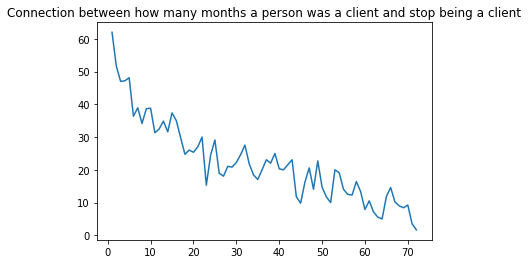

In [62]:
fig, ax = plt.subplots(facecolor='white')

ax.plot(z['month'], z['share_exit']*100)
plt.title("Connection between how many months a person was a client and stop being a client")

plt.show()

In [63]:
z.head(10)

,month,share_exit
0,1,0.619902
0,2,0.516807
0,3,0.47
0,4,0.471591
0,5,0.481203
0,6,0.363636
0,7,0.389313
0,8,0.341463
0,9,0.386555
0,10,0.387931


**Conclusion 7**: FIrst 5 months of using service have the highest risk of client quitting

In [64]:
df['monthly_charges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64

In [65]:
bins = []
for x in range(13):
    bins.append(x*10)

In [66]:
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

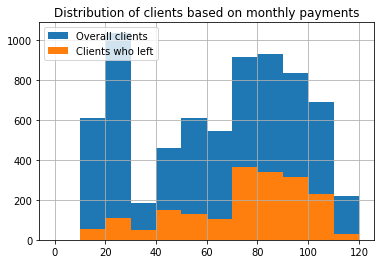

In [67]:
fig, ax = plt.subplots(facecolor='white')
df['monthly_charges'].hist(bins=bins)
df.query('exit == 1')['monthly_charges'].hist(bins=bins)
plt.title("Distribution of clients based on monthly payments")

ax.legend(['Overall clients','Clients who left'])
plt.show()

**Conclusion 8**: We have 2 groups of clients - one who pays less than 30 and another who pays 70-90

In [68]:
z = pd.DataFrame(columns=['payment', 'share_exit'])
t = 0
for x in range(2, 13):
    y = df.query('monthly_charges > @t and monthly_charges <= @x*10')
    y = y['exit'].sum()/len(y)
    z = pd.concat([z, pd.DataFrame(data={'payment': [ x*10], 'share_exit':[y]})])
    t = x*10

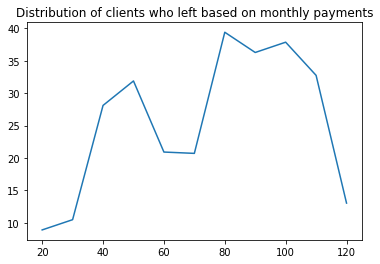

In [69]:
fig, ax = plt.subplots(facecolor='white')


ax.plot(z['payment'], z['share_exit']*100)
plt.title("Distribution of clients who left based on monthly payments")

plt.show()

**Conclusion 9**: Among the cleints who pay 80-100 we have the highst % of clients who left

In [70]:
z= df.query('use_internet == 1')


In [71]:
y = (z.groupby(by='exit')[['internet_service', 'online_sec', 
                      'online_backup', 'device_protect', 
                      'tech_sup', 'stream_tv', 'stream_movie']].sum() /
z.groupby(by='exit')[['internet_service', 'online_sec', 
                      'online_backup', 'device_protect', 
                      'tech_sup', 'stream_tv', 'stream_movie']].count())
y

,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie
exit,,,,,,,
0,0.478967,0.457934,0.506390,0.498669,0.460596,0.502929,0.509318
1,0.738610,0.167995,0.297836,0.310364,0.176538,0.463554,0.465831


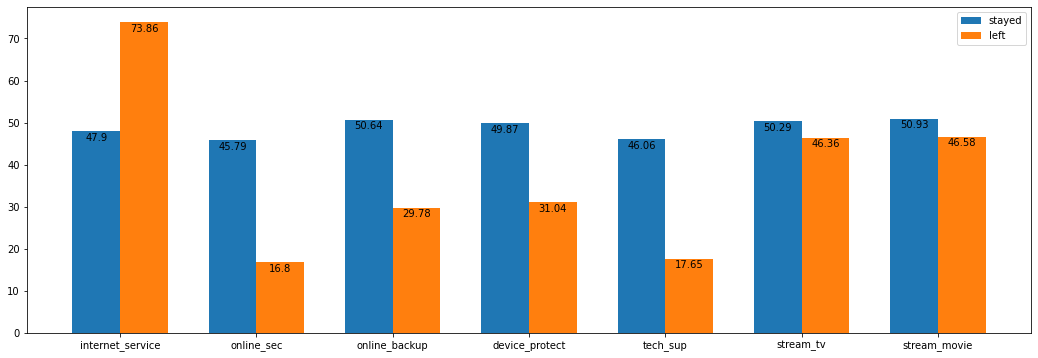

In [72]:
fig, ax = plt.subplots(facecolor='white', figsize=(18, 6))

labels = y.T.index
width = 0.35

x1 = ax.bar( np.arange(len(labels)) - width/2, round(y.T[0]*100,2), width, label='stayed')
x2 = ax.bar( np.arange(len(labels)) + width/2, round(y.T[1]*100, 2), width, label='left')

ax.bar_label(x1, padding=-11)
ax.bar_label(x2, padding=-11)
ax.set_xticks(np.arange(len(labels)), labels)
ax.legend()

plt.show()

**Conclusion 10**: Additional services (except for streaming) decrease the probavility of client exit

**Conclusion 11**: Big share of client who left used fiber optic connection

## Correlation analysis

In [73]:
x = df.corr()

In [74]:
def _color_correl(val):
    color = 'white'
    if val == 1:
        color = 'white'
    elif val > 0.8 or val < -0.8:
        color = 'red'
    elif val > 0.5 or val < -0.5:
        color = 'yellow'        
    return 'color: %s' % color

In [75]:
x.style.applymap(_color_correl)

,paperless,monthly_charges,total_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone
paperless,1.000000,0.351930,0.157830,0.168296,-0.052278,-0.017469,-0.013726,0.208427,0.004823,0.191454,0.326470,-0.004051,0.127056,0.104079,0.037536,0.224241,0.211583,-0.011902,0.156258,-0.013957,-0.110131,0.163746,0.320592,0.016696
monthly_charges,0.351930,1.000000,0.651065,0.058933,0.004810,0.042410,0.030055,0.271117,0.246862,0.192858,0.787195,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,-0.013779,0.219874,0.097825,-0.112343,0.490912,0.763191,0.248033
total_charges,0.157830,0.651065,1.000000,-0.446776,0.170569,0.186119,0.182663,-0.060436,0.825880,-0.199484,0.360769,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.000048,0.102411,0.319072,0.064653,0.469042,0.374878,0.113008
type_month,0.168296,0.058933,-0.446776,1.000000,-0.570053,-0.180159,-0.204960,0.330879,-0.649346,0.404565,0.243014,-0.246844,-0.164393,-0.225988,-0.285491,-0.112550,-0.117867,-0.003251,0.137752,-0.280202,-0.229715,-0.088558,0.217824,-0.001243
type_year,-0.052278,0.004810,0.170569,-0.570053,1.000000,0.057629,0.067590,-0.109546,0.202338,-0.178225,-0.076809,0.100658,0.084113,0.102911,0.096258,0.061930,0.064780,0.007755,-0.046491,0.083067,0.069222,-0.003594,-0.038061,-0.003142
method_bank,-0.017469,0.042410,0.186119,-0.180159,0.057629,1.000000,-0.278423,-0.377270,0.243822,-0.118136,-0.022779,0.094366,0.086942,0.083047,0.100472,0.046121,0.048755,-0.015973,-0.016235,0.111406,0.052369,0.075429,0.001094,0.008271
method_credit,-0.013726,0.030055,0.182663,-0.204960,0.067590,-0.278423,1.000000,-0.373978,0.232800,-0.134687,-0.050552,0.115473,0.090455,0.111252,0.117024,0.040010,0.048398,0.001632,-0.024359,0.082327,0.061134,0.060319,-0.001870,-0.006916
method_elcheck,0.208427,0.271117,-0.060436,0.330879,-0.109546,-0.377270,-0.373978,1.000000,-0.210197,0.301455,0.335763,-0.112295,-0.000364,-0.003308,-0.114807,0.144747,0.137420,0.000844,0.171322,-0.083207,-0.149274,0.083583,0.284608,0.002747
total_time,0.004823,0.246862,0.825880,-0.649346,0.202338,0.243822,0.232800,-0.210197,1.000000,-0.354049,0.017930,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.005285,0.015683,0.381912,0.163386,0.332399,0.037529,0.007877
exit,0.191454,0.192858,-0.199484,0.404565,-0.178225,-0.118136,-0.134687,0.301455,-0.354049,1.000000,0.307463,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,-0.008545,0.150541,-0.149982,-0.163128,0.040033,0.227578,0.011691


Let's chack only situations with high correlation

In [76]:
columns_tocheck = []
for column in x.columns:
    if x[column].nlargest(2)[1] > 0.7:
        columns_tocheck.append(column)

In [77]:
columns_tocheck2 = []
for column in x.columns:
    if x[column].min() < -0.7:
        columns_tocheck2.append(column)

In [78]:
for name in columns_tocheck2:
    if not name in  columns_tocheck:
        columns_tocheck.append(name)

In [79]:
x = x[columns_tocheck]
x.style.applymap(_color_correl)

,monthly_charges,total_charges,total_time,internet_service,use_internet
paperless,0.351930,0.157830,0.004823,0.326470,0.320592
monthly_charges,1.000000,0.651065,0.246862,0.787195,0.763191
total_charges,0.651065,1.000000,0.825880,0.360769,0.374878
type_month,0.058933,-0.446776,-0.649346,0.243014,0.217824
type_year,0.004810,0.170569,0.202338,-0.076809,-0.038061
method_bank,0.042410,0.186119,0.243822,-0.022779,0.001094
method_credit,0.030055,0.182663,0.232800,-0.050552,-0.001870
method_elcheck,0.271117,-0.060436,-0.210197,0.335763,0.284608
total_time,0.246862,0.825880,1.000000,0.017930,0.037529
exit,0.192858,-0.199484,-0.354049,0.307463,0.227578


1. We have 1 situation with high correlation - between total_time and total_charges. There is logic behid this, we can try to drop one of the columns. 
2. There are several borderline cases that can be investigated further if there will be problems with models. It's important to note that many of our variables are dummies, so using correlation for them is not as effective 

**Conclusion 12**: High correlation between total_time and total_charges - risk of collinearity, we need to drop one of them. There are bordeline cases we can look into later, in case there are problems with model

# _Results of prelimenary analysis

**References**

Phone: MultipleLine 1 - yes

Personal: Gender(Female/Male) - 0/1,  Partner, Dependents - 1 = yes

Internet: InternetService(DSL/Fiber optic) - 0/1, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies - 1 = yes

Contract: type: 2 year (0, 0), Payment method: Mailed check (0, 0, 0), PaperlessBilling - 1 = yes

**Results**

1. Data was loaded/Checked for errors
2. Data was prepared: all variables transformed into dummies, for 2 vars used OHE. 
3. For total cost we didn't have data for some observations, because those contracts just started - they were dropped
4. 2 new variables - exit (check if client dropped services) and total_time - number of months the client used company's services
5. Data was put in 1 df. 2 new variables we added - use_phone and use_internet
6. Renamed columns (variable new_names)

**Conclusions**:

**Conclusion 1**: people who use internet services have a higher chance of leaving (either less satisfied, or more flexible)

**Conclusion 2**: Using multiple lines correlates to a higher chance of leaving

**Conclusion 3**: Among those who used both services almost 1/3 left

**Conclusion 4**: Clients who left payed more on average

**Conclusion 5**: We have 1year and 2 year contracts. Some of them had their term renewed - so we can judge the decision of a client to renew them (or nor). Others didn't have their initial term expire. For example if a person signed a year countract in Dec 2019 - only 3 months have passed until the current date. So we don't know whether he will leave company. Having such people could scew the results.
This situaton appears in 148 2year and 118 1 year contracts

**Conclusion 6**: While we have data until 01.02.2020 - there are no contracts that were canceled on this date. Most likely the data on cancelations for 01.02.2020 was not given - so monthly contracts for Jan 2020 didn't have a chance to be cancelled yet - we need to take them out of the df.

**Conclusion 7**: FIrst 5 months of using service have the highest risk of client quitting

**Conclusion 8**: We have 2 groups of clients - one who pays less than 30 and another who pays 70-90

**Conclusion 9**: Among the cleints who pay 80-100 we have the highst % of clients who left

**Conclusion 10**: Additional services (except for streaming) decrease the probavility of client exit

**Conclusion 11**: Big share of client who left used fiber optic connection

**Conclusion 12**: High correlation between total_time and total_charges - risk of collinearity, we need to drop one of them. There are bordeline cases we can look into later, in case there are problems with model

**ALTERNATIVES**

1. We have 1 and 2 year contracts that couldn't be renewed yet. I dropped them because in theory they can't have exit=1 

2. Despite that we have a very few cases were such contracts were canceled after couple months. Are they error in data? Or they received such poor service? Since it's just a few strange cases they are dropped from df as well

3. There is a possibility to expand the task. While initial task is to make a prediction model when people cancel contract, the data allows to take into consideration the risk of loosing revenue the client brings insteasd of client himshelf

**Next steps**

1. Drop dates and client id. They don't give us useful information and dates cpould harm predicitons. Additionaly we need to drop total_charges as it has a high correlation with total_time var
2. Make 60/20/20 split
3. Try out couple simple models (Decision tree, random forest, logistic)
4. Try models with amount of lost revenue as error 
5. Try different parametrs using Gridsearch
6. Boosting
7. Check models accuracy, ROC-AUC, Precision, Recall


# Machine learning

## First stage

### Dropping useless parametrs  

In [80]:
x = df.query("begin_date == '2020-01-01'")
z = df.query('type_month == 0 and type_year == 0')
z = z.query('begin_date > "2018-01-01"')
y = df.query('type_year == 1')
y = y.query('begin_date > "2019-01-01"')
x = pd.concat([x, y,z])

In [81]:
print(x['exit'].sum()/x['exit'].count())
print(len(x))

0.01603206412825651
499


In [82]:
df_clean = df.merge(x[['customer_id', 'paperless']], left_on='customer_id', right_on='customer_id',
                    suffixes=('','_y'), how='left')
df_clean = df_clean.query('paperless_y != paperless_y')

In [83]:
df_clean = df_clean.drop(['customer_id', 'begin_date','end_date', 'paperless_y', 'total_charges'], axis=1)

### Creating 3 sub samples

In [84]:
features = df_clean.drop('exit', axis=1)
targets = df_clean['exit']

In [85]:
features_train, features_test, target_train, target_test = train_test_split(features, targets, 
                                                                            test_size=0.2,
                                                                            random_state=12345,
                                                                            shuffle=True,
                                                                           stratify = targets)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, 
                                                                            test_size=0.25,
                                                                            random_state=12345,
                                                                            shuffle=True,
                                                                            stratify = target_train)

In [86]:
features

,paperless,monthly_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone
1,0.0,56.95,0,1,0,0,0,34.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,1
2,1.0,53.85,1,0,0,0,0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,1
3,0.0,42.30,0,1,1,0,0,45.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,0
4,1.0,70.70,1,0,0,0,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,1
5,1.0,99.65,1,0,0,0,1,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,1.0,84.80,0,1,0,0,0,24.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1,1
7037,1.0,103.20,0,1,0,1,0,72.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,1.0,1.0,1.0,1,1
7038,1.0,29.60,1,0,0,0,1,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,1,0
7039,1.0,74.40,1,0,0,0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,1.0,1,1


### Preparing functions to quickly check results

1. Inititally checked 3 simple models to check everything is working. First 2 functions were used. (simple_models, check_stats)
2. When decided to try different hyperparametrs - ccreated 2 additional functions to check results on test and validation subsamples. (check_stats_noprint, check_stats_df)
3. We don't need first 2 functions. Left them here to remeber my logic 

In [87]:
def simple_models(features_train, target_train, features_valid, target_valid):
    print('Tree')
    model = DecisionTreeClassifier(max_depth=10, random_state=12345)
    model.fit(features_train, target_train)
    check_stats(features_valid, target_valid, model, 'validation')

    print('Random forest')
    model = RandomForestClassifier(max_depth=10, n_estimators = 20, random_state=12345)
    model.fit(features_train, target_train)
    check_stats(features_valid, target_valid, model, 'validation')

    print('Logistic')
    model = LogisticRegression(random_state=12345, max_iter=1000)
    model.fit(features_train, target_train)
    check_stats(features_valid, target_valid, model, 'validation')
    
    return

In [88]:
def check_stats(features, target, model, sample_type):
    print('Checking', sample_type,'subsample')
    predictions = model.predict(features)
    accuracy = accuracy_score(target, predictions) 
    print("accuracy: {0:.3f}".format(accuracy))
    precision = precision_score(target, predictions)
    print("precision: {0:.3f}".format(precision))
    recall = recall_score(target, predictions)
    print("recall: {0:.3f}".format(recall))
    f1 = f1_score(target, predictions)
    print("f1: {0:.3f}".format(f1))
    roc_prob = model.predict_proba(features)[:,1]
    auc_roc = roc_auc_score(target, roc_prob) 
    print("auc_roc: {0:.3f}".format(auc_roc))
    return

In [89]:
def check_stats_noprint(features, target, model, sample_type):
    predictions = model.predict(features)
    accuracy = accuracy_score(target, predictions) 
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc_prob = model.predict_proba(features)[:,1]
    auc_roc = roc_auc_score(target, roc_prob) 
    
    return accuracy, precision, recall, f1, auc_roc

In [90]:
def check_stats_df(features1, target1, features2, target2, model, sample_type1='train', sample_type2='valid'):
    result = pd.DataFrame(['accuracy', 'precision', 'recall', 'f1', 'auc_roc'],
                      columns=['Metrics'])
    result = result.set_index('Metrics') 
    x, y, z, t, e = check_stats_noprint(features1, target1, model, sample_type1)
    s = pd.Series([x, y, z, t, e], index=result.index)
    result[sample_type1] = s
    
    x, y, z, t, e = check_stats_noprint(features2, target2, model, sample_type2)
    s = pd.Series([x, y, z, t, e], index=result.index)
    result[sample_type2] = s
    return result

### Trying simple models

In [91]:
simple_models(features_train, target_train, features_valid, target_valid)

Tree
Checking validation subsample
accuracy: 0.772
precision: 0.616
recall: 0.527
f1: 0.568
auc_roc: 0.769
Random forest
Checking validation subsample
accuracy: 0.804
precision: 0.690
recall: 0.567
f1: 0.622
auc_roc: 0.853
Logistic
Checking validation subsample
accuracy: 0.793
precision: 0.647
recall: 0.597
f1: 0.621
auc_roc: 0.844


Accuracy is fine, but there is a problem with correctly identifying client who cancel contracts

We need to upsample them 

We could used balanced class option, but it's easier to upsample



### Upsample train

In [92]:
features_train['exit'] = target_train
df_minority = features_train[features_train['exit'] == 1]
df_majority = features_train[features_train['exit'] == 0]  
df_minority_upsampled = resample(df_minority,random_state=12345,n_samples=len(df_majority), replace=True)
features_train_up = pd.concat([df_minority_upsampled,df_majority])
target_train_up = features_train_up['exit']
features_train_up = features_train_up.drop('exit', axis=1)
features_train = features_train.drop('exit', axis=1)

In [93]:
target_train_up.mean()

0.5

### Trying simple models (upsample train)

In [94]:
simple_models(features_train_up, target_train_up, features_valid, target_valid)

Tree
Checking validation subsample
accuracy: 0.752
precision: 0.550
recall: 0.694
f1: 0.614
auc_roc: 0.786
Random forest
Checking validation subsample
accuracy: 0.791
precision: 0.607
recall: 0.745
f1: 0.669
auc_roc: 0.855
Logistic
Checking validation subsample
accuracy: 0.748
precision: 0.538
recall: 0.804
f1: 0.644
auc_roc: 0.843


Didn't improve results much, but still a useful step

### Gridsearch random forest

Trying different hyoerparameters

In [95]:
param_grid ={'max_depth': range(5, 12),
             'n_estimators':[100, 200, 300, 400, 500],
             'max_features': ['auto', 'sqrt', 'log2'],
             'random_state': [12345],
             'criterion' :['gini', 'entropy']}  
param_grid ={'max_depth': range(7, 9),
             'n_estimators':[200, 300],
             'max_features': ['auto'],
             'random_state': [12345],
             'criterion' :['gini']} 
#Used 1 param_grid then switched to the second one to speed up rerunnig code

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, n_jobs = -1, verbose=4) 
grid.fit(features_train_up, target_train_up) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(7, 9),
                         'max_features': ['auto'], 'n_estimators': [200, 300],
                         'random_state': [12345]},
             verbose=4)

In [96]:
model = grid.best_estimator_

In [97]:
model

RandomForestClassifier(max_depth=8, n_estimators=300, random_state=12345)

In [98]:
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

,train,valid
Metrics,,
accuracy,0.870324,0.782277
precision,0.838489,0.588235
recall,0.917349,0.779570
f1,0.876148,0.670520
auc_roc,0.942342,0.859610


1. Model is a little better than initial simle ones. But it is overfitted now
2. Because of that tried to lower the depthand the number of trees
3. Tried the final results on the test subsample - not so bad, but still there is room for improvemnt

In [99]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 300,
                               random_state=12345
                               )
model.fit(features_train_up, target_train_up)
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

,train,valid
Metrics,,
accuracy,0.811721,0.757066
precision,0.785202,0.550186
recall,0.858212,0.795699
f1,0.820085,0.650549
auc_roc,0.898965,0.855437


In [100]:
check_stats_df(features_train_up, target_train_up, 
               features_test, target_test, 
               model, 'train', 'test')

,train,test
Metrics,,
accuracy,0.811721,0.777693
precision,0.785202,0.579256
recall,0.858212,0.795699
f1,0.820085,0.670442
auc_roc,0.898965,0.858882


### Gridsearch Logistic Regression

In [101]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid1 = GridSearchCV(LogisticRegression(max_iter=1000, random_state = 12345),
                     grid_values, refit = True, n_jobs = -1, verbose=2) 
grid1.fit(features_train_up, target_train_up) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=12345),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [102]:
model = grid1.best_estimator_

In [103]:
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

,train,valid
Metrics,,
accuracy,0.777164,0.747899
precision,0.759333,0.537770
recall,0.811543,0.803763
f1,0.784570,0.644397
auc_roc,0.849288,0.843243


The results for logistic regression didn't change a lot

In [104]:
check_stats_df(features_train_up, target_train_up, 
               features_test, target_test, 
               model, 'train', 'test')

,train,test
Metrics,,
accuracy,0.777164,0.764706
precision,0.759333,0.561303
recall,0.811543,0.787634
f1,0.784570,0.655481
auc_roc,0.849288,0.845535


### Gridsearch  XGBClassifier

In [105]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=12345
)

In [106]:
parameters = {
    'max_depth': range (4, 9, 1),
    'n_estimators': range(20, 80, 40),
    'learning_rate': [0.1, 0.01,  0.005,  0.001],
    'subsample' : [0.175, 0.2, 0.225]
}
parameters = {
    'max_depth': range (7, 8, 1),
    'n_estimators': range(80, 120, 40),
    'learning_rate': [0.1],
    'subsample' : [0.175]
}
#Used 1 parameters then switched to the second one to speed up rerunnig code
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=False
)
grid_search.fit(features_train_up, target_train_up) 

[12:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

In [107]:
model = grid_search.best_estimator_

In [108]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=12345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=12345,
              subsample=0.175, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [109]:
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

,train,valid
Metrics,,
accuracy,0.892946,0.779985
precision,0.876708,0.598592
recall,0.914499,0.685484
f1,0.895205,0.639098
auc_roc,0.958836,0.849557


The overfitting problem is here again, tried to vary parametrs a bit

Helped but not significantly

In [110]:
model = XGBClassifier(objective= 'binary:logistic', nthread=4,seed=12345, use_label_encoder=False ,
                      n_jobs = 10, learning_rate = 0.0175, max_depth=8, 
                      n_estimators=300, gamma = 7, subsample = 0.2, max_delta_step  = 1, 
                      )
model.fit(features_train_up, target_train_up)  
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

[12:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,train,valid
Metrics,,
accuracy,0.816352,0.778457
precision,0.813117,0.585062
recall,0.821518,0.758065
f1,0.817296,0.660422
auc_roc,0.900801,0.862344


In [111]:
check_stats_df(features_train_up, target_train_up, 
               features_test, target_test, 
               model, 'train', 'test')

,train,test
Metrics,,
accuracy,0.816352,0.770053
precision,0.813117,0.577007
recall,0.821518,0.715054
f1,0.817296,0.638655
auc_roc,0.900801,0.858201


## Adding new parametrs

This should be part of the "initial assessment" block. But to remever logic I decided to put it here

New features:

1. total_time squared - maybe there is non-linear effect of how long the client was with the company
2. monthly_charges squared - initital graphs looked like inverted parabola
3. the month the client started using services
4. how many additional services the client uses

In [112]:
df['start_month'] = pd.DatetimeIndex(df['begin_date']).month
df['total_time_sq'] = df['total_time'] * df['total_time']
df['monthly_charges_sq'] = df['monthly_charges'] * df['monthly_charges']
df['sum'] = (df['online_sec'] + df['online_backup'] +
             df['device_protect'] + df['tech_sup'] +
             df['stream_tv'] + df['stream_movie'])

In [113]:
x = df.query("begin_date == '2020-01-01'")
z = df.query('type_month == 0 and type_year == 0')
z = z.query('begin_date > "2018-01-01"')
y = df.query('type_year == 1')
y = y.query('begin_date > "2019-01-01"')
x = pd.concat([x, y,z])

In [114]:
df_clean = df.merge(x[['customer_id', 'paperless']], left_on='customer_id', right_on='customer_id',
                    suffixes=('','_y'), how='left')
df_clean = df_clean.query('paperless_y != paperless_y')

In [115]:
df_clean = df_clean.drop(['customer_id', 'begin_date','end_date', 'paperless_y', 'total_charges'], axis=1)

In [116]:
df_clean

,paperless,monthly_charges,type_month,type_year,method_bank,method_credit,method_elcheck,total_time,exit,internet_service,online_sec,online_backup,device_protect,tech_sup,stream_tv,stream_movie,gender,senior,partner,dependents,multiple_lines,use_internet,use_phone,start_month,total_time_sq,monthly_charges_sq,sum
1,0.0,56.95,0,1,0,0,0,34.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,1,4,1156.0,3243.3025,2.0
2,1.0,53.85,1,0,0,0,0,2.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,1,10,4.0,2899.8225,2.0
3,0.0,42.30,0,1,1,0,0,45.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1,0,5,2025.0,1789.2900,3.0
4,1.0,70.70,1,0,0,0,1,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,1,9,4.0,4998.4900,0.0
5,1.0,99.65,1,0,0,0,1,8.0,1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0.0,0.0,1.0,1,1,3,64.0,9930.1225,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,1.0,84.80,0,1,0,0,0,24.0,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1,1,2,576.0,7191.0400,5.0
7037,1.0,103.20,0,1,0,1,0,72.0,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,1.0,1.0,1.0,1,1,2,5184.0,10650.2400,4.0
7038,1.0,29.60,1,0,0,0,1,11.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,1,0,3,121.0,876.1600,1.0
7039,1.0,74.40,1,0,0,0,0,4.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,1.0,1,1,7,16.0,5535.3600,0.0


## 2nd stage

### 3 subsamples

In [117]:
features = df_clean.drop('exit', axis=1)
targets = df_clean['exit']

In [118]:
features_train, features_test, target_train, target_test = train_test_split(features, targets, 
                                                                            test_size=0.2,
                                                                            random_state=12345,
                                                                            shuffle=True,
                                                                           stratify = targets)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, 
                                                                            test_size=0.25,
                                                                            random_state=12345,
                                                                            shuffle=True,
                                                                            stratify = target_train)

### Upsample train (again)

In [119]:
features_train['exit'] = target_train
df_minority = features_train[features_train['exit'] == 1]
df_majority = features_train[features_train['exit'] == 0]  
df_minority_upsampled = resample(df_minority,random_state=12345,n_samples=len(df_majority), replace=True)
features_train_up = pd.concat([df_minority_upsampled,df_majority])
target_train_up = features_train_up['exit']
features_train_up = features_train_up.drop('exit', axis=1)
features_train = features_train.drop('exit', axis=1)

In [120]:
target_train_up.mean()

0.5

### Retraining models

In [121]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 300,
                               random_state=12345
                               )
model.fit(features_train_up, target_train_up)
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

,train,valid
Metrics,,
accuracy,0.827752,0.783804
precision,0.817899,0.589178
recall,0.843249,0.790323
f1,0.830381,0.675086
auc_roc,0.913499,0.867577


In [122]:
check_stats_df(features_train_up, target_train_up, 
               features_test, target_test, 
               model, 'train', 'test')

,train,test
Metrics,,
accuracy,0.827752,0.778457
precision,0.817899,0.587607
recall,0.843249,0.739247
f1,0.830381,0.654762
auc_roc,0.913499,0.864220


In [123]:
model = XGBClassifier(objective= 'binary:logistic', nthread=4,seed=12345, use_label_encoder=False ,
                      n_jobs = 10, learning_rate = 0.0175, max_depth=8, 
                      n_estimators=300, gamma = 7, subsample = 0.2, max_delta_step  = 1, 
                      )
model.fit(features_train_up, target_train_up)  
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

[12:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,train,valid
Metrics,,
accuracy,0.855896,0.828877
precision,0.862745,0.670507
recall,0.846455,0.782258
f1,0.854523,0.722084
auc_roc,0.934586,0.902138


In [124]:
check_stats_df(features_train_up, target_train_up, 
               features_test, target_test, 
               model, 'train', 'test')

,train,test
Metrics,,
accuracy,0.855896,0.816654
precision,0.862745,0.653488
recall,0.846455,0.755376
f1,0.854523,0.700748
auc_roc,0.934586,0.897477


 XGBClassifier gave ROC_AUC 0,9 on validation subsample! Test subsample has the same results. 

The targeted metric value is achieved. There are possibilities to improve, but let's finalize current results

# Final model

### Checking final models results once again 

Retrain, test and illustrate the final model in 1 place


In [125]:
model = XGBClassifier(objective= 'binary:logistic', nthread=4,seed=12345, use_label_encoder=False ,
                      n_jobs = 10, learning_rate = 0.0175, max_depth=8, 
                      n_estimators=300, gamma = 7, subsample = 0.2, max_delta_step  = 1, 
                      )
model.fit(features_train_up, target_train_up)  
check_stats_df(features_train_up, target_train_up, 
               features_valid, target_valid, 
               model, 'train', 'valid')

[12:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,train,valid
Metrics,,
accuracy,0.855896,0.828877
precision,0.862745,0.670507
recall,0.846455,0.782258
f1,0.854523,0.722084
auc_roc,0.934586,0.902138


In [126]:
check_stats_df(features_train_up, target_train_up, 
               features_test, target_test, 
               model, 'train', 'test')

,train,test
Metrics,,
accuracy,0.855896,0.816654
precision,0.862745,0.653488
recall,0.846455,0.755376
f1,0.854523,0.700748
auc_roc,0.934586,0.897477


Check auc_roc for test subsample separately

In [127]:
roc_prob = model.predict_proba(features_test)[:,1]
auc_roc = roc_auc_score(target_test, roc_prob)
print("auc_roc: {0:.4f}".format(auc_roc))

auc_roc: 0.8975


In [128]:
probabilities_test = model.predict_proba(features_test)
probabilities_test1= probabilities_test[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probabilities_test1) 
probabilities_train = model.predict_proba(features_train)
probabilities_train1= probabilities_train[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(target_train, probabilities_train1) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_valid1= probabilities_valid[:, 1]
fpr_valid, tpr_valid, thresholds_valid = roc_curve(target_valid, probabilities_valid1) 

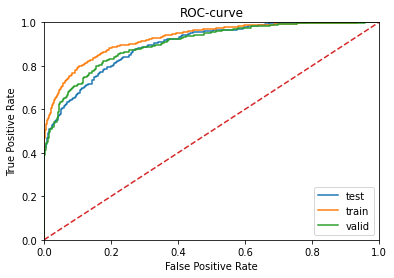

In [129]:
fig, ax = plt.subplots(facecolor='white')

plt.plot(fpr_test, tpr_test, label='test')
plt.plot(fpr_train, tpr_train, label='train')
plt.plot(fpr_valid, tpr_valid, label='valid')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-curve')
plt.legend()

plt.show()

There is a gap between test subsample and others, but all of them are quite close

### Checking features importance

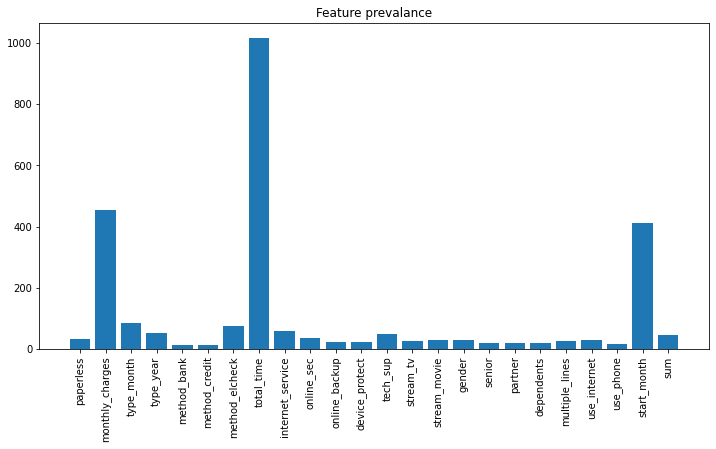

In [130]:
fig, ax = plt.subplots(facecolor='white', figsize=(12, 6))
x = model.get_booster().get_score(importance_type="weight")

plt.title("Feature prevalance")

plt.bar(range(len(x)), list(x.values()), align='center' )
plt.xticks(range(len(x)), list(x.keys()), rotation=90)

plt.show()

In [131]:
ticks = features_train_up.columns
axis = np.arange(len(model.feature_importances_))

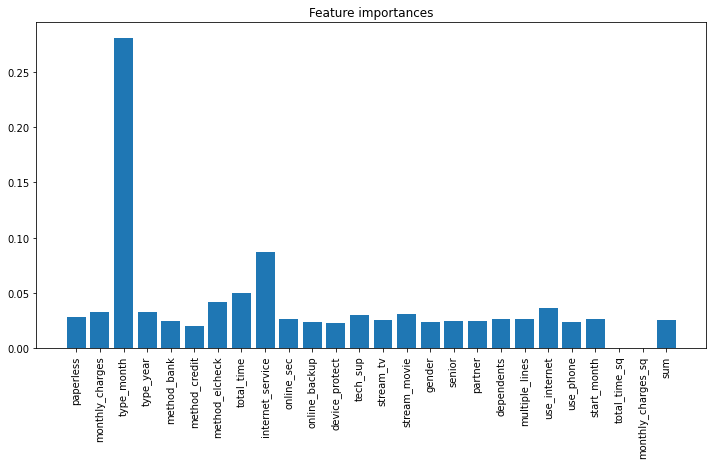

In [132]:
fig, ax = plt.subplots(facecolor='white', figsize=(12, 6))

plt.title("Feature importances")

plt.bar(axis, model.feature_importances_)
plt.xticks(axis,ticks, rotation=90)
plt.show()

In [133]:
x = model.get_booster().get_score(importance_type="weight")
x = pd.DataFrame(pd.Series(x).to_frame())
y = model.get_booster().get_score(importance_type="gain")
x['gain'] = pd.DataFrame(pd.Series(y).to_frame())
x['weight'] = x[0]
x['gain']= round(x['gain'], 1)
x=x.drop(0, axis=1)
x.sort_values(by=['gain','weight'], ascending=False)

,gain,weight
type_month,75.6,85.0
internet_service,23.5,58.0
total_time,13.4,1014.0
method_elcheck,11.3,76.0
use_internet,9.8,28.0
type_year,8.9,53.0
monthly_charges,8.8,454.0
stream_movie,8.4,30.0
tech_sup,8.2,48.0
paperless,7.6,34.0


# _Final results and conslusions

**Conclusions**

1. Final model reaches required level of accuracy. On test subsample it provides around 81% of right answers. 
2. The model has higher recall then precision. So it's better at spotting people wo can potentially leave but has a bit higher rate of false positives. In situations where retaining new client is cheaper than finding new one - it's a good trade off.
3. The idea to use modified loss functions could be used later - right now the task was focused primaliry on correctly identyfing clients who can potentially cancel
